# **Importing the required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# **Importing the training dataset**

In [2]:
train_dataset = pd.read_csv('mnist_train.csv')
X_train = train_dataset.iloc[:, 1:].values
y_train = train_dataset.iloc[:, 0].values

In [3]:
X_train.shape

(60000, 784)

In [4]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [5]:
y_train.shape

(60000,)

In [6]:
for i in range(100):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4
3
5
3
6
1
7
2
8
6
9
4
0
9
1
1
2
4
3
2
7
3
8
6
9
0
5
6
0
7
6
1
8
7
9
3
9
8
5
9
3
3
0
7
4
9
8
0
9
4
1
4
4
6
0
4
5
6
1
0
0
1
7
1
6
3
0
2
1
1
7
9
0
2
6
7
8
3
9
0
4
6
7
4
6
8
0
7
8
3
1


# **Importing the test dataset**

In [7]:
test_dataset = pd.read_csv('mnist_test.csv')
X_test = test_dataset.iloc[:, 1:].values
y_test = test_dataset.iloc[:, 0].values

In [8]:
X_test.shape

(10000, 784)

In [9]:
for i in range(1):
  print(X_test[i])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198 198 198 198 198 170  52   

In [10]:
y_test.shape

(10000,)

In [11]:
for i in range(100):
  print(y_test[i])

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9


# **Feature Scaling**

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
for i in range(1):
  print(X_train[i])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
 -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
 -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
 -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
 -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534598e-03
 -8.52241235e-03 -1.19850

In [14]:
for i in range(1):
  print(X_test[i])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
 -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
 -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
 -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
 -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534598e-03
 -8.52241235e-03 -1.19850

# **Training the model on the training dataset**

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# **Predicting the Test set results**

In [16]:
y_pred = model.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[7, 7],
       [2, 2],
       [1, 1],
       ...,
       [4, 4],
       [8, 5],
       [6, 6]])

# **Building the confusion matrix**

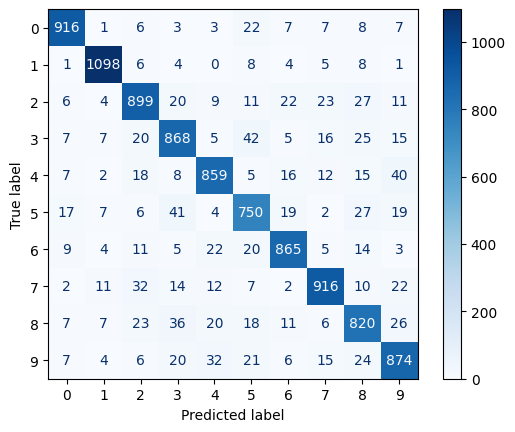

In [17]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# **Calculating accuracy**

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Rate: {accuracy:.4f}")

Accuracy Rate: 0.8865


# **Calculating precision, recall and f1-score and plotting the graph**

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       980
           1       0.96      0.97      0.96      1135
           2       0.88      0.87      0.87      1032
           3       0.85      0.86      0.86      1010
           4       0.89      0.87      0.88       982
           5       0.83      0.84      0.84       892
           6       0.90      0.90      0.90       958
           7       0.91      0.89      0.90      1028
           8       0.84      0.84      0.84       974
           9       0.86      0.87      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



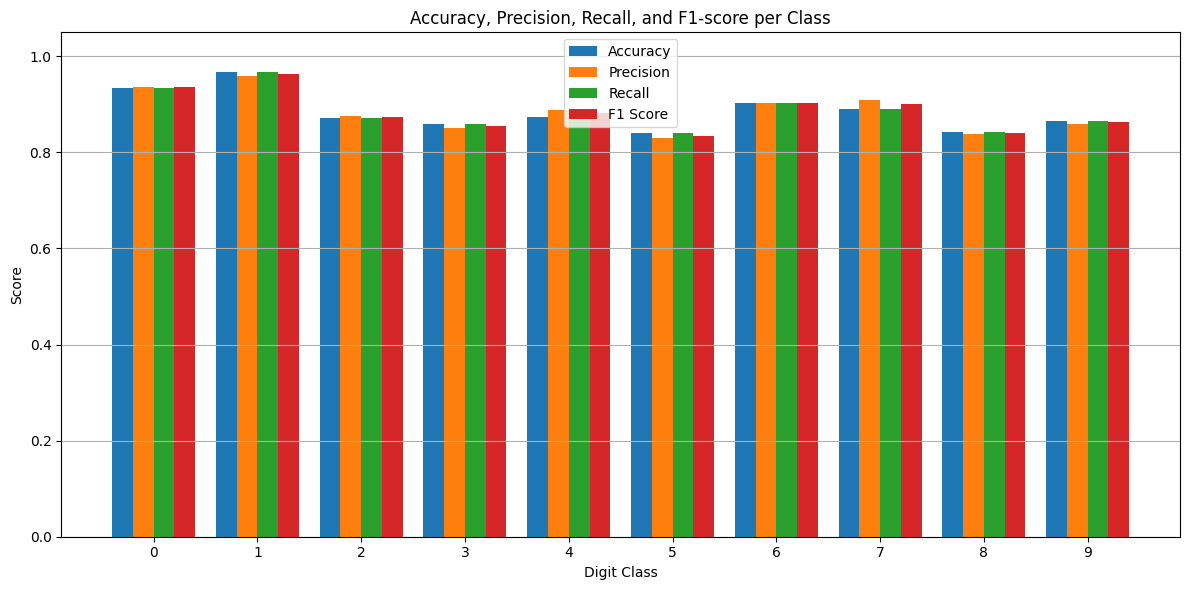

In [20]:
accuracy = cm.diagonal() / cm.sum(axis=1)
precision = precision_score(y_test, y_pred, average=None, labels=np.arange(10))
recall = recall_score(y_test, y_pred, average=None, labels=np.arange(10))
f1 = f1_score(y_test, y_pred, average=None, labels=np.arange(10))

classes = np.arange(10)
x = np.arange(len(classes))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.xlabel('Digit Class')
plt.ylabel('Score')
plt.title('Accuracy, Precision, Recall, and F1-score per Class')
plt.xticks(x, classes)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Analyzing Misclassifications**

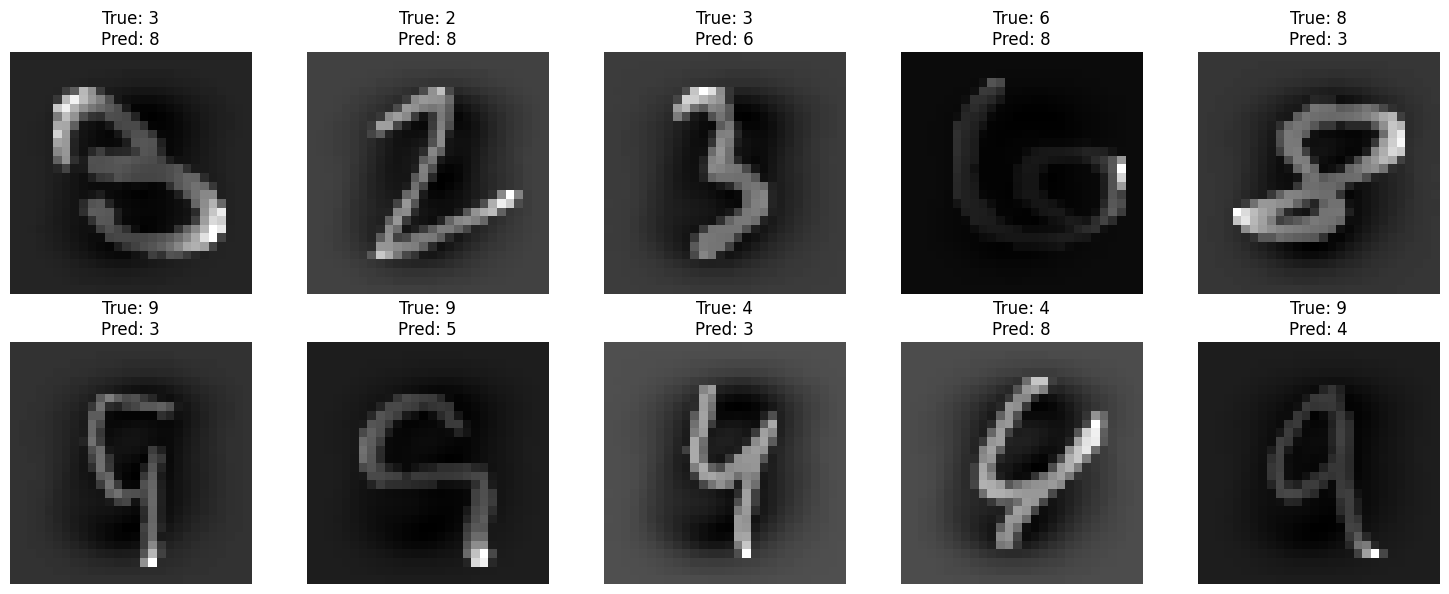

In [21]:
misclassified_indices = np.where(y_pred != y_test)[0]
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    index = misclassified_indices[i]
    ax = axes[i // 5, i % 5]
    ax.imshow(X_test[index].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[index]}\nPred: {y_pred[index]}")
    ax.axis('off')
plt.tight_layout()
plt.show()